# Comparison Real Robot VS Simulation Experiments (Foraging)

In [1]:
%matplotlib inline  
# Load the libraries
import glob2, re
import pandas as pd
import numpy as np
import json
import pickle
import networkx as nx
import community as comm
from collections import Counter
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap

## Write pickle files

In [139]:
%store -r REALROBOT_FORAGING_COMMUNICATION_GRAPHS
%store -r REALROBOT_FORAGING_COMMUNICATION_COST
%store -r REALROBOT_FORAGING_PRIVACY_COEEFICIENT
%store -r REALROBOT_FORAGING_FINISHING_TIMES
%store -r REALROBOT_FORAGING_SUCCESS_PERCENTAGES

%store -r SIMULATION_FORAGING_COMMUNICATION_GRAPHS
%store -r SIMULATION_FORAGING_COMMUNICATION_COST
%store -r SIMULATION_FORAGING_PRIVACY_COEFFICIENT
%store -r SIMULATION_FORAGING_FINISHING_TIMES
%store -r SIMULATION_FORAGING_SUCCESS_PERCENTAGES

In [142]:
pickle.dump( REALROBOT_FORAGING_COMMUNICATION_GRAPHS, open( "REALROBOT_FORAGING_COMMUNICATION_GRAPHS.pickle", "wb" ) )
pickle.dump( REALROBOT_FORAGING_COMMUNICATION_COST, open( "REALROBOT_FORAGING_COMMUNICATION_COST.pickle", "wb" ) )
pickle.dump( REALROBOT_FORAGING_PRIVACY_COEEFICIENT, open( "REALROBOT_FORAGING_PRIVACY_COEEFICIENT.pickle", "wb" ) )
pickle.dump( REALROBOT_FORAGING_FINISHING_TIMES, open( "REALROBOT_FORAGING_FINISHING_TIMES.pickle", "wb" ) )
pickle.dump( REALROBOT_FORAGING_SUCCESS_PERCENTAGES, open( "REALROBOT_FORAGING_SUCCESS_PERCENTAGES.pickle", "wb" ) )
pickle.dump( SIMULATION_FORAGING_COMMUNICATION_GRAPHS, open( "SIMULATION_FORAGING_COMMUNICATION_GRAPHS.pickle", "wb" ) )
pickle.dump( SIMULATION_FORAGING_COMMUNICATION_COST, open( "SIMULATION_FORAGING_COMMUNICATION_COST.pickle", "wb" ) )
pickle.dump( SIMULATION_FORAGING_PRIVACY_COEFFICIENT, open( "SIMULATION_FORAGING_PRIVACY_COEFFICIENT.pickle", "wb" ) )
pickle.dump( SIMULATION_FORAGING_FINISHING_TIMES, open( "SIMULATION_FORAGING_FINISHING_TIMES.pickle", "wb" ) )
pickle.dump( SIMULATION_FORAGING_SUCCESS_PERCENTAGES, open( "SIMULATION_FORAGING_SUCCESS_PERCENTAGES.pickle", "wb" ) )

## Load pickle files

In [6]:
REALROBOT_FORAGING_COMMUNICATION_GRAPHS = pickle.load(open("REALROBOT_FORAGING_COMMUNICATION_GRAPHS.pickle", "rb"))
REALROBOT_FORAGING_COMMUNICATION_COST = pickle.load(open("REALROBOT_FORAGING_COMMUNICATION_COST.pickle", "rb"))
REALROBOT_FORAGING_PRIVACY_COEEFICIENT = pickle.load(open("REALROBOT_FORAGING_PRIVACY_COEEFICIENT.pickle", "rb"))
REALROBOT_FORAGING_FINISHING_TIMES = pickle.load(open("REALROBOT_FORAGING_FINISHING_TIMES.pickle", "rb"))
REALROBOT_FORAGING_SUCCESS_PERCENTAGES = pickle.load(open("REALROBOT_FORAGING_SUCCESS_PERCENTAGES.pickle", "rb"))
SIMULATION_FORAGING_COMMUNICATION_GRAPHS = pickle.load(open("SIMULATION_FORAGING_COMMUNICATION_GRAPHS.pickle", "rb"))
SIMULATION_FORAGING_COMMUNICATION_COST = pickle.load(open("SIMULATION_FORAGING_COMMUNICATION_COST.pickle", "rb"))
SIMULATION_FORAGING_PRIVACY_COEFFICIENT = pickle.load(open("SIMULATION_FORAGING_PRIVACY_COEFFICIENT.pickle", "rb"))
SIMULATION_FORAGING_FINISHING_TIMES = pickle.load(open("SIMULATION_FORAGING_FINISHING_TIMES.pickle", "rb"))
SIMULATION_FORAGING_SUCCESS_PERCENTAGES = pickle.load(open("SIMULATION_FORAGING_SUCCESS_PERCENTAGES.pickle", "rb"))

In [7]:
# Specify the search terms for filtering the files
ROBOT_RANGE = range(1,17)
TOKEN_RANGE = [2,4,5,6,7,8]
DENSITY_OF_TOKENS = '\d'
TIMEOUT_THRESHOLD = 5100

# Color palette for figures 

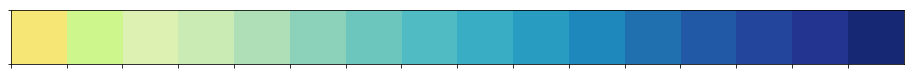

In [8]:
color_map = sns.color_palette("YlGnBu", n_colors=len(ROBOT_RANGE))
color_map = color_map.as_hex()
color_map[0] = '#f5e675'
color_map[1] = '#cdf68d'

#color_map = sns.cubehelix_palette(n_colors=len(ROBOT_RANGE), light=0.7, rot=-0.4)

linestyles = ['-', '--', '-.', ':', '-', '-']
markers=['x', ',', '^', 'o', '.']
loosely_dotted = (0, (5,10))
dashdotted = (0, (3, 5, 1, 5))
linestyles = ['solid','dashed','dashdot','dotted', dashdotted, loosely_dotted]
sns.palplot(color_map)

## Figure for finishing time for all configurations (All bars)

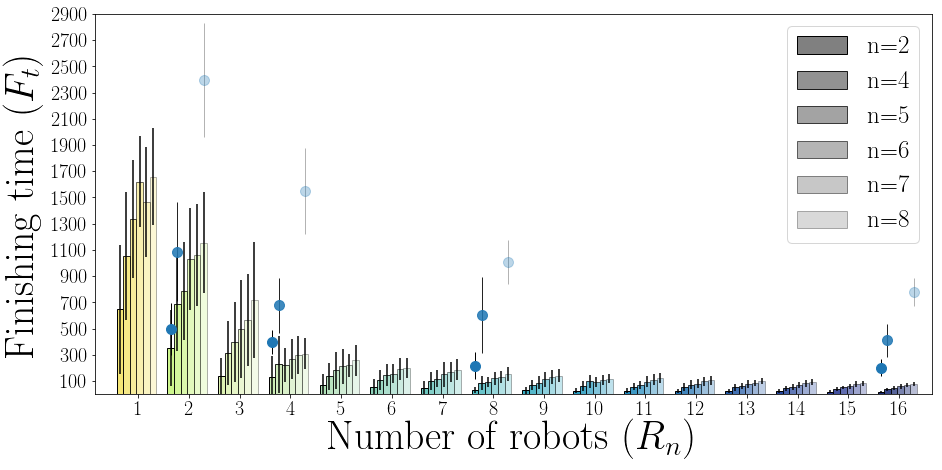

In [9]:
# Finishing Time Calculation
plt.figure(figsize=(15,7))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

bar_width = 0.13
opacity = 0.4

for y, NUMBER_OF_TOKENS in enumerate([2,4,8]):
    robot_array =[d2[y] for d2 in [d1[:] for d1 in REALROBOT_FORAGING_FINISHING_TIMES]]
    rr = np.array([2,4,8,16])
    if NUMBER_OF_TOKENS == 8:
        plt.errorbar(rr+(bar_width*2.5*y), list(map(np.nanmean, zip(robot_array))), yerr=list(map(np.nanstd, zip(robot_array))), ecolor='k', fmt='o', markersize=10, lw=1, alpha=1-(y*2.5*0.14))
    else:
        plt.errorbar(rr+(bar_width*y), list(map(np.nanmean, zip(robot_array))), yerr=list(map(np.nanstd, zip(robot_array))), fmt='o', markersize=10, ecolor='k', lw=1, alpha=1-(y*0.14))


for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    robot_array =[d2[y] for d2 in [d1[:] for d1 in SIMULATION_FORAGING_FINISHING_TIMES]]
    rr = np.array(ROBOT_RANGE)
    plt.bar(rr+(bar_width*y), list(map(np.nanmean, zip(robot_array))), bar_width, yerr=list(map(np.nanstd, zip(robot_array))), label='n='+str(NUMBER_OF_TOKENS), color=color_map,  edgecolor='k', lw=1, alpha=1-(y*0.14))
    plt.legend(loc=1, prop={'size': 25})
    

ax = plt.gca()
leg = ax.get_legend()
for y, NUMBER_OF_TOKENS in enumerate(TOKEN_RANGE):
    leg.legendHandles[y].set_color('grey')
    leg.legendHandles[y].set_edgecolor('black')
    
plt.tick_params(labelsize=20)
plt.xticks(rr+0.36, tuple((i) for i in ROBOT_RANGE))
plt.xlabel('Number of robots' + ' ' + r'$(R_{n})$' , fontsize=40)
plt.yticks([i*100 for i in range(1,40, 2)])
plt.ylabel('Finishing time' + ' ' + r'$(F_{t})$', fontsize=40)
plt.axis([min(ROBOT_RANGE)-0.5, max(ROBOT_RANGE) + 1, 0, TIMEOUT_THRESHOLD-2200])
plt.show()

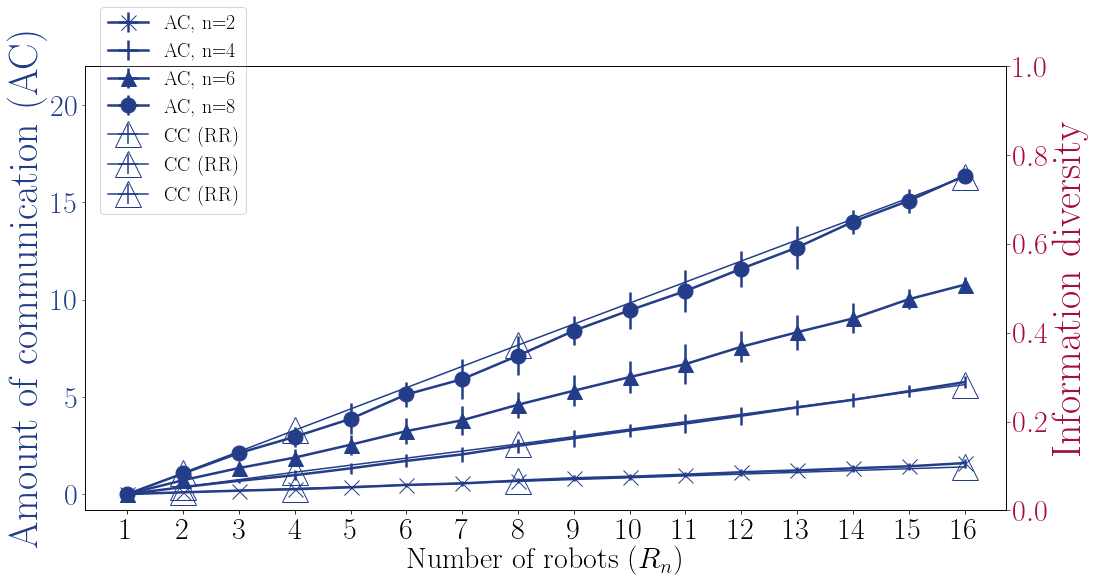

In [10]:
# Communication Cost Vs Information Diversity
fig, ax1 = plt.subplots(figsize=(15,8))

# CC Simulation
task_range = [0, 1, 3, 5]
task_id = [2, 4, 6, 8]

for y, task in enumerate(task_range):
    
    robot_row = []
    robot_row_std = []
    
    for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
        if NUMBER_OF_ROBOTS == 1:
            robot_row.append(0)
            robot_row_std.append(0)
        else:
            robot_row.append(np.nanmean(SIMULATION_FORAGING_COMMUNICATION_COST[x][task]))
            robot_row_std.append(np.nanstd(SIMULATION_FORAGING_COMMUNICATION_COST[x][task]))

    ax1.errorbar(ROBOT_RANGE, robot_row, xerr=0, yerr=robot_row_std, color='#233D89', markersize=15, marker=markers[y], label=str('AC, n=' + str(task_id[y])), lw=2.5)

ax1.set_xlabel('Number of robots' + ' ' +  r'$(R_{n})$', fontsize=30)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Amount of communication (AC)', color='#233D89', fontsize=40)
ax1.tick_params('y', colors='#233D89')
ax1.set_ylim(top=22.0)
plt.xticks(tuple((i) for i in ROBOT_RANGE))
plt.tick_params(labelsize=30)
plt.legend(loc='center left',prop={'size': 20}, bbox_to_anchor=(0.005, 0.78))

# CC Real-Robots
task_range = [0, 1, 2]
for y, task in enumerate(task_range):
    
    robot_row = []
    robot_row_std = []
    for x, NUMBER_OF_ROBOTS in enumerate([2, 4, 8, 16]):
        robot_row.append(np.nanmean(REALROBOT_FORAGING_COMMUNICATION_COST[x][task]))
        robot_row_std.append(np.nanstd(REALROBOT_FORAGING_COMMUNICATION_COST[x][task]))

    ax1.errorbar([2, 4, 8, 16], robot_row, xerr=0, yerr=robot_row_std, marker='^', fillstyle='none', color='#233D89', markersize=26, label=str('CC (RR)')) 

plt.legend(loc='center left',prop={'size': 20}, bbox_to_anchor=(0.005, 0.9))

# Information Diversity 
ax2 = ax1.twinx()

# # Information Diversity Simulation
# robot_row = []
# robot_row_std = []

# for x, NUMBER_OF_ROBOTS in enumerate(ROBOT_RANGE):
#     robot_row.append(np.nanmean(SIMULATION_FORAGING_PRIVACY_COEFFICIENT[x]))
#     robot_row_std.append(np.nanstd(SIMULATION_FORAGING_PRIVACY_COEFFICIENT[x]))

# ax2.errorbar(ROBOT_RANGE, robot_row, xerr=0, yerr=robot_row_std, marker='o', c='#A4103B', markersize=12, label=str(r'$I_{e}$' + ' ' + '(SIM)')) 

# # Information Diversity Real Robots
# robot_row = []
# robot_row_std = []

# for x, NUMBER_OF_ROBOTS in enumerate([16, 20, 24, 28]):
#     robot_row.append(np.nanmean([i for i in REALROBOT_FORAGING_PRIVACY_COEFFICIENT[x] if i is not None]))
#     robot_row_std.append(np.nanstd([i for i in REALROBOT_FORAGING_PRIVACY_COEFFICIENT[x] if i is not None]))
    
# ax2.errorbar([16, 20, 24, 28], robot_row, xerr=0, yerr=robot_row_std, marker='s', markeredgewidth=2, fillstyle='none', color='#A4103B', markersize=20, label=str(r'$I_{e}$' + ' ' + '(RR)')) 

# # Limit for Privacy
# ax2.errorbar(range(16,33), np.ones(17), xerr=0, yerr=0, c='black', ls='dashed', markersize=20, label=str(r'$I_{e}$ (limit)'), lw=2.5) 

ax2.set_ylabel('Information diversity', color='#A4103B', fontsize=40)
ax2.tick_params('y', colors='#A4103B')
fig.tight_layout()
plt.tick_params(labelsize=30)
plt.legend(loc='center left',prop={'size': 20}, bbox_to_anchor=(0.005, 0.7))
plt.show()